In [12]:

#-------------  VERSION 1 ---------------#
#----   Prefered option since looks cleaner ----#

import pandas as pd     #   library to be able to access each of the csv files
import glob             #   library to be able to access the path 
import numpy as np      #   library that sumplifies mathematical operations
import matplotlib.pyplot as plt
import joblib

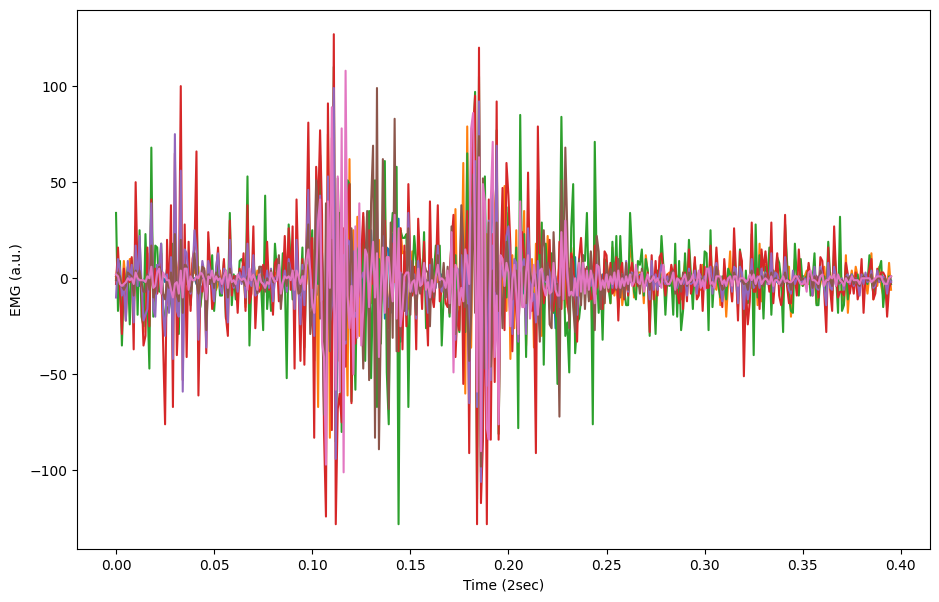

In [13]:
emg = pd.read_csv("Angel/10.Angel.csv", index_col=1, delimiter=',', usecols=range(1,9))

time = np.array([i/1000 for i in range(0, len(emg), 1)]) # sampling rate 1000 Hz

fig = plt.figure()
plt.plot(time, emg)
plt.xlabel('Time (2sec)')
plt.ylabel('EMG (a.u.)')
fig_name = 'fig2.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

c:\Users\19pil\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


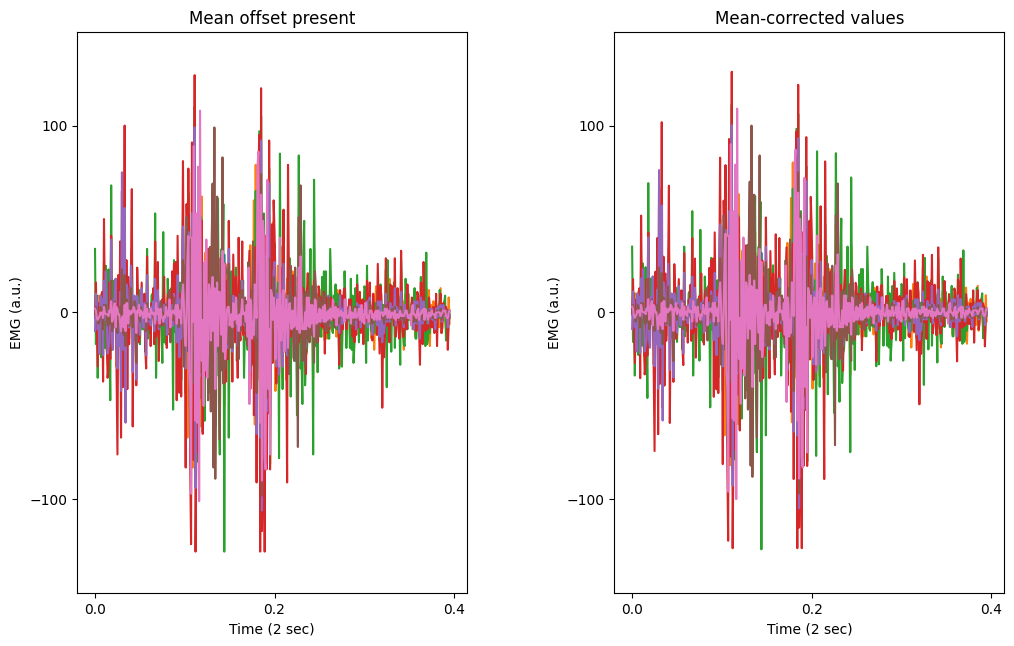

In [14]:
# process EMG signal: remove mean
emg_correctmean = emg - np.mean(emg)

# plot comparison of EMG with offset vs mean-corrected values
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Mean offset present')
plt.plot(time, emg)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-150, 150)
plt.xlabel('Time (2 sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Mean-corrected values')
plt.plot(time, emg_correctmean)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-150, 150)
plt.xlabel('Time (2 sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig2.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

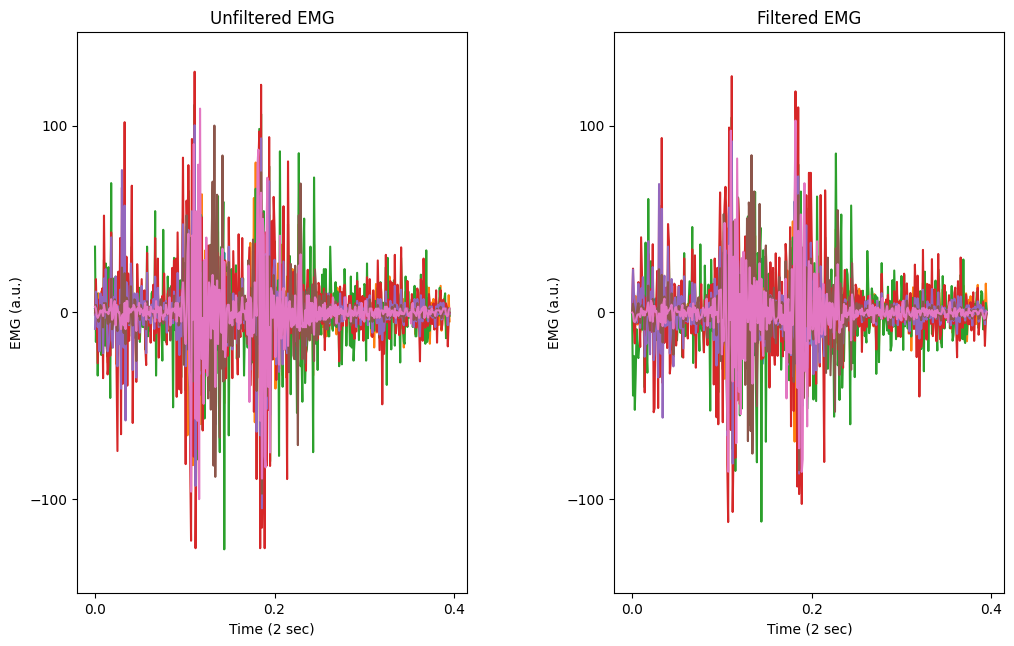

In [15]:
import scipy as sp
from scipy.signal import filtfilt

# create bandpass filter for EMG
high = 20/(1000/2)
low = 450/(1000/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# process EMG signal: filter EMG
emg_filtered = sp.signal.filtfilt(b, a, emg_correctmean, axis=0) # axis makes the change

# plot comparison of unfiltered vs filtered mean-corrected EMG
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Unfiltered EMG')
plt.plot(time, emg_correctmean)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-150, 150)
plt.xlabel('Time (2 sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Filtered EMG')
plt.plot(time, emg_filtered)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-150, 150)
plt.xlabel('Time (2 sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig3.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

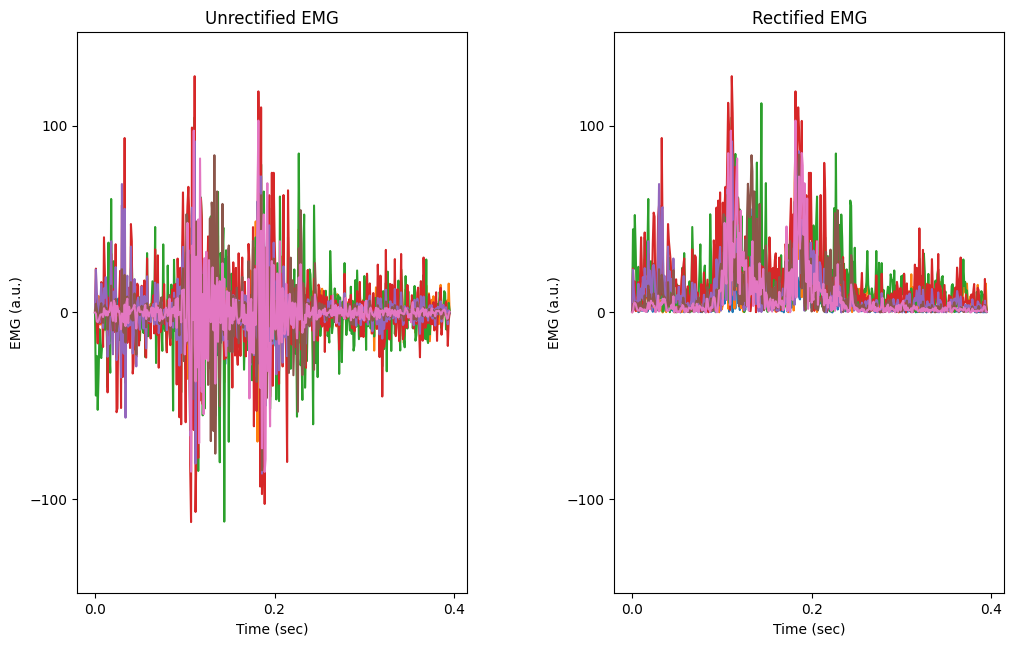

In [16]:
# process EMG signal: rectify
emg_rectified = abs(emg_filtered)

# plot comparison of unrectified vs rectified EMG
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Unrectified EMG')
plt.plot(time, emg_filtered)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-150, 150)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Rectified EMG')
plt.plot(time, emg_rectified)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-150, 150)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig4.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

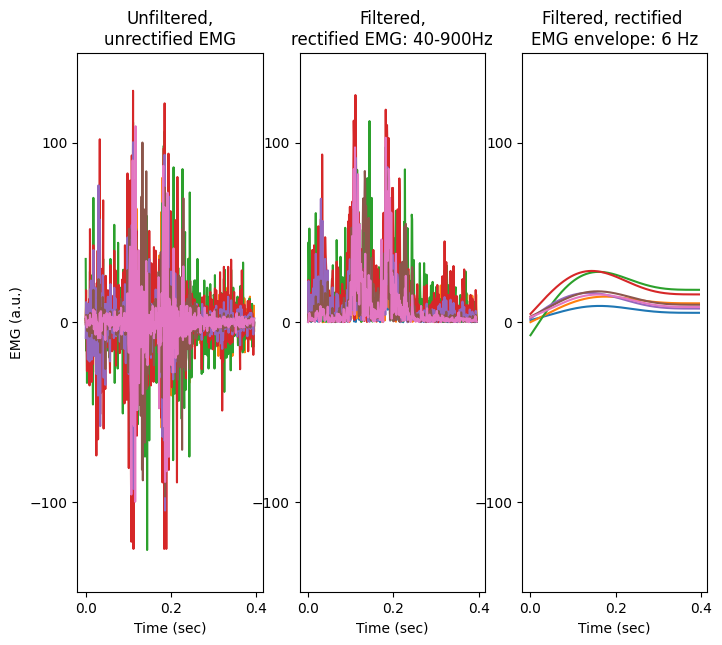

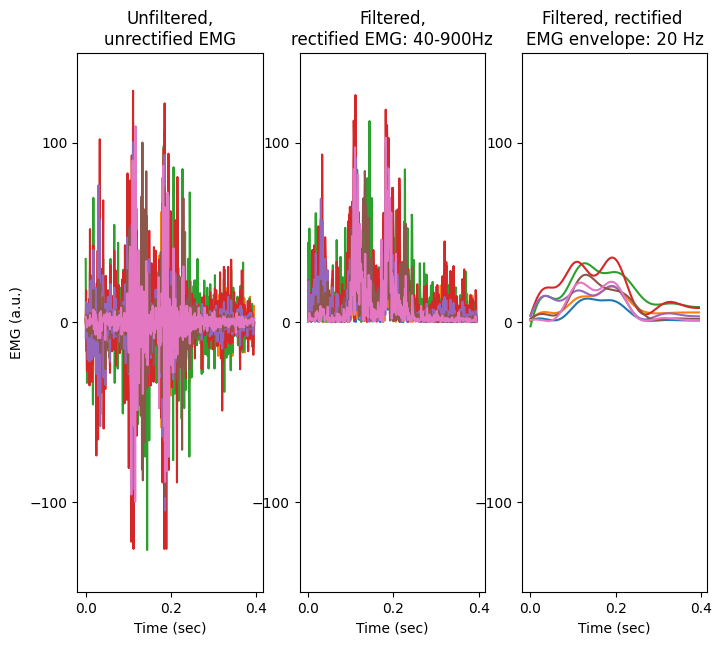

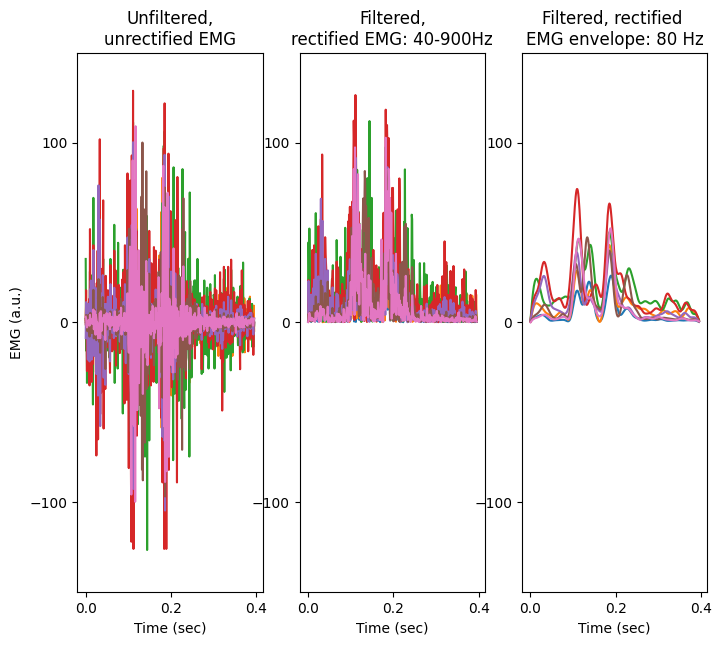

In [23]:
def filteremg(time, emg, low_pass=10, sfreq=1000, high_band=20, low_band=450):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg, axis=0)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified, axis=0)
    
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 4, 1)
    plt.subplot(1, 4, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(time, emg)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-150, 150)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    
    plt.subplot(1, 4, 2)
    plt.subplot(1, 4, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(time, emg_rectified)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-150, 150)
    #plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 4, 3)
    plt.subplot(1, 4, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(time, emg_envelope)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-150, 150)
    #plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')
    
    # plt.subplot(1, 4, 4)
    # plt.subplot(1, 4, 4).set_title('Focussed region')
    # plt.plot(time, emg_envelope)
    # plt.locator_params(axis='x', nbins=4)
    # plt.locator_params(axis='y', nbins=4)
    # #plt.xlim(0.9, 1.0)
    # plt.ylim(-150, 150)
    # plt.xlabel('Time (sec)')

    fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

# show what different low pass filter cut-offs do
for i in [3, 10, 40]:
    filteremg(time, emg_correctmean, low_pass=i)